<a href="https://colab.research.google.com/github/HayatHACHEMI/Hottest-Topics-ML/blob/master/Hottest_Topics_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Hottest Topics in Machine Learning** 

Neural Information Processing Systems (NIPS) is one of the top machine learning conferences in the world. It covers topics ranging from deep learning and computer vision to cognitive science and reinforcement learning.

<img src="https://sda.tech/wp-content/uploads/2018/01/Nips.jpg" width="100" height="100" alt="The logo of NIPS (Neural Information Processing Systems)" />

In this Project, we will analyze a large collection of NIPS research papers  to discover the latest trends in machine learning.

 We will perform Natural Language Processing using Python, pandas, sklearn, and the latent Dirichlet allocation (LDA) method on NIPS papers to uncover the trendiest topics in machine learning research.




**What is topic modeling?** 
Topic modeling is a branch of unsupervised natural language processing which is used to represent a text document with the help of several topics, that can best explain the underlying information in a particular document. 

**What is LDA?** 
Latent Dirichlet Allocation [(LDA)](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


**Importing Libraries** 

In [ ]:
import pandas as pd # TO use pandas Dataframes
import numpy as np

import matplotlib.pyplot as plt  # To vizualize 
%matplotlib inline

import re # The regular expression library
import wordcloud # The wordcloud library

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation as LDA # Load the LDA model from sk-learn

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

## **1.Data** 

### **1.1.Loading Data**

The dataset includes the title, authors, abstracts, and extracted text for all NIPS papers to date (ranging from the first 1987 conference to the current 2016 conference), it is available on [Kaggle](https://www.kaggle.com/benhamner/nips-papers?select=papers.csv) 

Let's dowload Kaggle API to use any dataset directly from the kaggle source ! 

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload() #pour uploader kaggle.json

In [ ]:
!mkdir .kaggle
!mv kaggle.json .kaggle
!ls -lha

mkdir: cannot create directory ‘.kaggle’: File exists
total 142M
drwxr-xr-x 1 root root 4.0K Aug  4 21:44 .
drwxr-xr-x 1 root root 4.0K Aug  4 20:12 ..
drwxr-xr-x 1 root root 4.0K Aug  3 16:17 .config
drwxr-xr-x 2 root root 4.0K Aug  4 21:44 .kaggle
-rw-r--r-- 1 root root 142M Aug  4 20:11 nips-papers.zip
drwxr-xr-x 1 root root 4.0K Jul 30 16:30 sample_data


In [ ]:
!ls -lha .kaggle

total 12K
drwxr-xr-x 2 root root 4.0K Aug  4 21:44 .
drwxr-xr-x 1 root root 4.0K Aug  4 21:44 ..
-rw-r--r-- 1 root root   68 Aug  4 21:44 kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [ ]:
!kaggle datasets download -d benhamner/nips-papers

nips-papers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

nips-papers.zip  sample_data


In [9]:
!unzip \*.zip  -d /data

Archive:  nips-papers.zip
replace /data/authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
!ls -lh /data

total 408M
-rw-r--r-- 1 root root 188K Sep 20  2019 authors.csv
-rw-r--r-- 1 root root 207M Sep 20  2019 database.sqlite
-rw-r--r-- 1 root root 310K Sep 20  2019 paper_authors.csv
-rw-r--r-- 1 root root 201M Sep 20  2019 papers.csv


In [11]:
papers=pd.read_csv('/data/papers.csv')

### **1.2.Exploring Data**

In [12]:
papers.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [13]:
print(papers.paper_text[0][:1000] + ' ...')

767

SELF-ORGANIZATION OF ASSOCIATIVE DATABASE
AND ITS APPLICATIONS
Hisashi Suzuki and Suguru Arimoto
Osaka University, Toyonaka, Osaka 560, Japan
ABSTRACT
An efficient method of self-organizing associative databases is proposed together with
applications to robot eyesight systems. The proposed databases can associate any input
with some output. In the first half part of discussion, an algorithm of self-organization is
proposed. From an aspect of hardware, it produces a new style of neural network. In the
latter half part, an applicability to handwritten letter recognition and that to an autonomous
mobile robot system are demonstrated.

INTRODUCTION
Let a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another
finite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly
from X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some
estimate j : X -+ Y of f to make small, the estimation error in some measure.


In order to understand how the machine learning field has evolved over time, we will begin by visualizing the number of publications per year from 1987.

Text(0.5, 1.0, 'Machine Learning Publications since 1987')

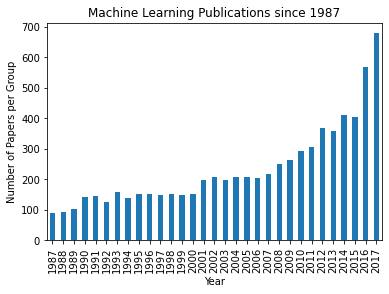

In [14]:
# Group the papers by year
groups =papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Papers per Group')
plt.title('Machine Learning Publications since 1987')

### **1.3.Preprocessing Data**

For the analysis of this project , we only consider in the text data associated with the paper and the year the paper was published in so that it is necessary to remove all the columns that do not contain useful text information.

1. **year**: Year the paper was published
2. **title**: Title of paper
3. **paper_text**: Text of paper


In [15]:
# Keep interesting columns 
papers=papers[['year','title','paper_text']]

# Print out the first rows of papers
papers.head(10)

,year,title,paper_text
0,1987,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a..."
5,1994,Using a neural net to instantiate a deformable...,U sing a neural net to instantiate a\ndeformab...
6,1994,Plasticity-Mediated Competitive Learning,Plasticity-Mediated Competitive Learning\n\nTe...
7,1994,ICEG Morphology Classification using an Analog...,ICEG Morphology Classification using an\nAnalo...
8,1994,Real-Time Control of a Tokamak Plasma Using Ne...,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1994,Pulsestream Synapses with Non-Volatile Analogu...,Real-Time Control of a Tokamak Plasma\nUsing N...


Let's now analyze the titles of the different papers to identify machine learning trends. 
First, we will perform some simple preprocessing on the titles in order to make them more amenable for analysis. We will use a regular expression to **remove any punctuation** in the title. Then we will **perform lowercasing**. 

In [18]:

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows 
papers['title_processed'].head(10)

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object

##  **2.Visualizing the preprocessed text data**
To have a visual representation of the most common words, let's make a word cloud of the titles of the research papers. 

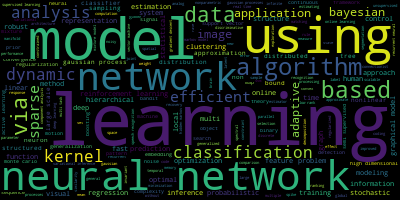

In [19]:
# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## **3.Preparing the text for LDA analysis**
 LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in the research titles are. These topics can then be used as a starting point for further analysis.

LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document. In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. 

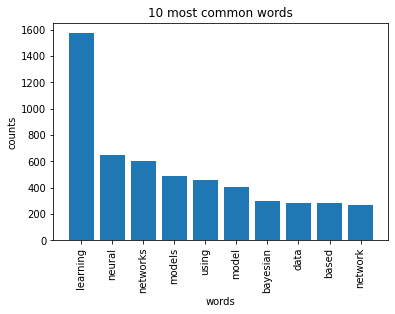

In [20]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## **4.Analysing trends with LDA**



In [21]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
neural networks network model using recurrent vector support spike analog

Topic #1:
learning data clustering dimensional decision probabilistic high analysis sparse maximum

Topic #2:
learning based feature recognition kernel deep natural reinforcement selection model

Topic #3:
learning human model using networks classification reinforcement data modeling approximation

Topic #4:
learning markov order hidden random error analysis bounds deep fields

Topic #5:
bayesian learning sampling gradient policy propagation using model networks belief

Topic #6:
optimization learning online algorithms sparse stochastic convex linear inference efficient

Topic #7:
learning supervised adaptive based monte carlo optimal semi using search

Topic #8:
learning multi matrix active rank estimation low multiple task classification

Topic #9:
models gaussian learning process inference graphical processes latent using model
